# Decision Tree Classifier Algorithm

Decision tree builds classification or regression models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. A decision node (e.g., Outlook) has two or more branches (e.g., Sunny, Overcast and Rainy). Leaf node (e.g., Play) represents a classification or decision. The topmost decision node in a tree which corresponds to the best predictor called root node. Decision trees can handle both categorical and numerical data. 

<b>Entropy:</b><br>		
A decision tree is built top-down from a root node and involves partitioning the data into subsets that contain instances with similar values (homogenous). ID3 algorithm uses entropy to calculate the homogeneity of a sample. If the sample is completely homogeneous the entropy is zero and if the sample is an equally divided it has entropy of one.

<b>Information Gain:</b><br>		
The information gain is based on the decrease in entropy after a dataset is split on an attribute. Constructing a decision tree is all about finding attribute that returns the highest information gain (i.e., the most homogeneous branches).

<b>Gini Impurity:</b><br>
Gini Impurity is a measurement of the likelihood of an incorrect classification of a new instance of a random variable, if that new instance were randomly classified according to the distribution of class labels from the data set

Example:

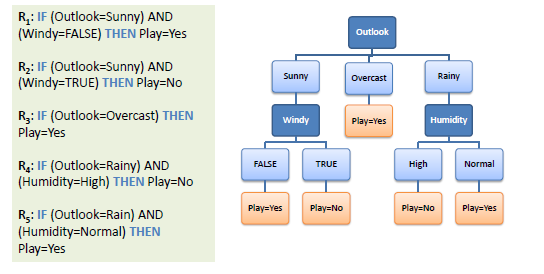

In [2]:
import pandas as pd
import numpy as np

from sklearn import set_config
set_config(print_changed_only=False)

from sklearn.preprocessing import LabelEncoder
from sklearn import tree

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df =pd.read_csv("salaries.csv")
df

,Company,Job,Degree,Salary_more_than_100k
0,Google,sales executive,bachelors,0
1,Google,sales executive,masters,0
2,Google,business manager,bachelors,1
3,Google,business manager,masters,1
4,Google,computer programmer,bachelors,0
5,Google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [17]:
df.Salary_more_than_100k.value_counts()

1    13
0     9
Name: Salary_more_than_100k, dtype: int64

In [4]:
X_crds = df.drop('Salary_more_than_100k',axis='columns')

X_crds.head()

,Company,Job,Degree
0,Google,sales executive,bachelors
1,Google,sales executive,masters
2,Google,business manager,bachelors
3,Google,business manager,masters
4,Google,computer programmer,bachelors


In [5]:
X_crds

,Company,Job,Degree
0,Google,sales executive,bachelors
1,Google,sales executive,masters
2,Google,business manager,bachelors
3,Google,business manager,masters
4,Google,computer programmer,bachelors
5,Google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [6]:
y_crds = df['Salary_more_than_100k']
y_crds

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    0
17    0
18    1
19    1
20    0
21    1
Name: Salary_more_than_100k, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()


In [9]:
le_job

LabelEncoder()

In [10]:
#X_crds['company_new']= LabelEncoder.fit_transform(X_crds['Company'])
X_crds['company_new']= le_company.fit_transform(X_crds['Company'])
X_crds['job_new']= le_company.fit_transform(X_crds['Job'])
X_crds['degree_new']= le_company.fit_transform(X_crds['Degree'])
X_crds

,Company,Job,Degree,company_new,job_new,degree_new
0,Google,sales executive,bachelors,0,2,0
1,Google,sales executive,masters,0,2,1
2,Google,business manager,bachelors,0,0,0
3,Google,business manager,masters,0,0,1
4,Google,computer programmer,bachelors,0,1,0
5,Google,computer programmer,masters,0,1,1
6,abc pharma,sales executive,masters,2,2,1
7,abc pharma,computer programmer,bachelors,2,1,0
8,abc pharma,business manager,bachelors,2,0,0
9,abc pharma,business manager,masters,2,0,1


In [ ]:
type(X_crds.company_new)

In [ ]:
X_crds.dtypes

In [11]:
X_crds_new=X_crds.drop(['Company','Job','Degree'],axis='columns')
X_crds_new

,company_new,job_new,degree_new
0,0,2,0
1,0,2,1
2,0,0,0
3,0,0,1
4,0,1,0
5,0,1,1
6,2,2,1
7,2,1,0
8,2,0,0
9,2,0,1


In [12]:
from sklearn import tree


In [18]:
model=tree.DecisionTreeClassifier(criterion='entropy')
#model=tree.DecisionTreeClassifier()

In [19]:
model.fit(X_crds_new,y_crds)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [15]:
model.predict([[2,0,1]])

array([1], dtype=int64)

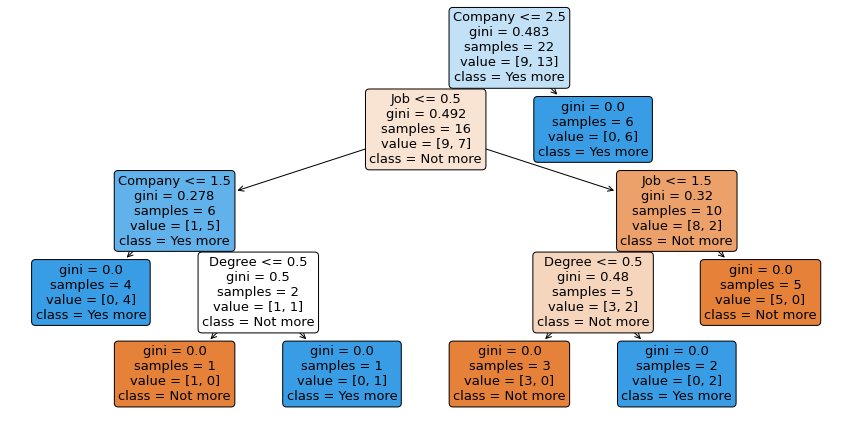

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7.5))
tree.plot_tree(model,filled=True,rounded=True,class_names=["Not more", "Yes more"],feature_names=X_crds.columns);

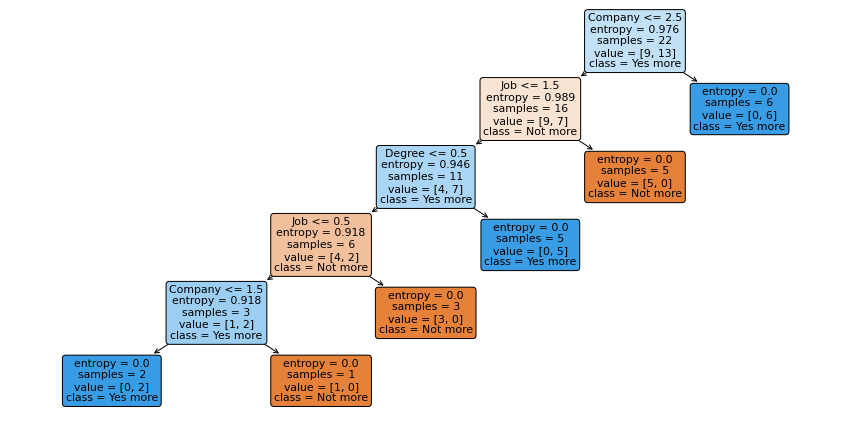

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7.5))
tree.plot_tree(model,filled=True,rounded=True,class_names=["Not more", "Yes more"],feature_names=X_crds.columns);

Assignment : Using the Breast cancer data , create a decision tree algorithm, find the confusion matrix
using HR salaries data build a logistic regression